# 6.3 Geographic Visualization 

### This script contains the following:
#### 1. Import data and libraries
#### 2. Data wrangling
#### 3. Data cleaning
#### 4. Plotting a choropleth

### 1. Import data and libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os
import folium
import json

In [2]:
# This command propts matplotlib visuals to appear in the notebook 

%matplotlib inline

In [3]:
# Import ".json" file for the U.S. 

country_geo = r'C:\Rasheed-D-Drive\CareerFoundry_Data-Analysis\Career-Foundry\Data_Immersion\Achievement-06\Excercise-03\us-states.json'

In [4]:
# That's just in case you want to look at the JSON file contents here too:

f = open(r'C:\Rasheed-D-Drive\CareerFoundry_Data-Analysis\Career-Foundry\Data_Immersion\Achievement-06\Excercise-03\us-states.json',)
  
# returns JSON object asa dictionary
data = json.load(f)
  
# Iterating through the json list
for i in data['features']:
    print(i)

{'type': 'Feature', 'id': 'AL', 'properties': {'name': 'Alabama'}, 'geometry': {'type': 'Polygon', 'coordinates': [[[-87.359296, 35.00118], [-85.606675, 34.984749], [-85.431413, 34.124869], [-85.184951, 32.859696], [-85.069935, 32.580372], [-84.960397, 32.421541], [-85.004212, 32.322956], [-84.889196, 32.262709], [-85.058981, 32.13674], [-85.053504, 32.01077], [-85.141136, 31.840985], [-85.042551, 31.539753], [-85.113751, 31.27686], [-85.004212, 31.003013], [-85.497137, 30.997536], [-87.600282, 30.997536], [-87.633143, 30.86609], [-87.408589, 30.674397], [-87.446927, 30.510088], [-87.37025, 30.427934], [-87.518128, 30.280057], [-87.655051, 30.247195], [-87.90699, 30.411504], [-87.934375, 30.657966], [-88.011052, 30.685351], [-88.10416, 30.499135], [-88.137022, 30.318396], [-88.394438, 30.367688], [-88.471115, 31.895754], [-88.241084, 33.796253], [-88.098683, 34.891641], [-88.202745, 34.995703], [-87.359296, 35.00118]]]}}
{'type': 'Feature', 'id': 'AK', 'properties': {'name': 'Alaska'},

In [5]:
path = r'C:\Users\abdul\CareerFoundry-Assignment-06\02-Data\Prepared-Data'

In [6]:
# Import the recipes data

df = pd.read_csv(os.path.join(path, 'airport_clean_updated_62.csv'))

In [7]:
df.shape

(3594452, 23)

In [8]:
df.columns

Index(['Unnamed: 0', 'Index', 'Origin_airport', 'Destination_airport',
       'Origin_city', 'Destination_city', 'Passengers', 'Seats', 'Flights',
       'Distance', 'Fly_date', 'Origin_population', 'Destination_population',
       'Org_airport_lat', 'Org_airport_long', 'Dest_airport_lat',
       'Dest_airport_long', 'Fly_year', 'Fly_month', 'Fly_day',
       'Fly_year_month', 'Distance_Category', 'Fly_year_Category'],
      dtype='object')

In [9]:
df=df.drop(columns=['Unnamed: 0'])

In [10]:
df.shape

(3594452, 22)

In [11]:
df.head()

,Index,Origin_airport,Destination_airport,Origin_city,Destination_city,Passengers,Seats,Flights,Distance,Fly_date,...,Org_airport_lat,Org_airport_long,Dest_airport_lat,Dest_airport_long,Fly_year,Fly_month,Fly_day,Fly_year_month,Distance_Category,Fly_year_Category
0,1,EUG,RDM,"Eugene, OR","Bend, OR",41,396,22,103,1990-11-01,...,44.124599,-123.211998,44.254101,-121.150002,1990,11,1,1990-11,Short Distance,1990-1994
1,2,EUG,RDM,"Eugene, OR","Bend, OR",88,342,19,103,1990-12-01,...,44.124599,-123.211998,44.254101,-121.150002,1990,12,1,1990-12,Short Distance,1990-1994
2,3,EUG,RDM,"Eugene, OR","Bend, OR",11,72,4,103,1990-10-01,...,44.124599,-123.211998,44.254101,-121.150002,1990,10,1,1990-10,Short Distance,1990-1994
3,4,MFR,RDM,"Medford, OR","Bend, OR",0,18,1,156,1990-02-01,...,42.374199,-122.873001,44.254101,-121.150002,1990,2,1,1990-02,Short Distance,1990-1994
4,5,MFR,RDM,"Medford, OR","Bend, OR",11,18,1,156,1990-03-01,...,42.374199,-122.873001,44.254101,-121.150002,1990,3,1,1990-03,Short Distance,1990-1994


In [12]:
# separate city and state into separate columns
df[['Origin_city', 'Origin_state']] = df['Origin_city'].str.split(', ', expand=True)

In [13]:
df.columns

Index(['Index', 'Origin_airport', 'Destination_airport', 'Origin_city',
       'Destination_city', 'Passengers', 'Seats', 'Flights', 'Distance',
       'Fly_date', 'Origin_population', 'Destination_population',
       'Org_airport_lat', 'Org_airport_long', 'Dest_airport_lat',
       'Dest_airport_long', 'Fly_year', 'Fly_month', 'Fly_day',
       'Fly_year_month', 'Distance_Category', 'Fly_year_Category',
       'Origin_state'],
      dtype='object')

In [14]:
df.head()

,Index,Origin_airport,Destination_airport,Origin_city,Destination_city,Passengers,Seats,Flights,Distance,Fly_date,...,Org_airport_long,Dest_airport_lat,Dest_airport_long,Fly_year,Fly_month,Fly_day,Fly_year_month,Distance_Category,Fly_year_Category,Origin_state
0,1,EUG,RDM,Eugene,"Bend, OR",41,396,22,103,1990-11-01,...,-123.211998,44.254101,-121.150002,1990,11,1,1990-11,Short Distance,1990-1994,OR
1,2,EUG,RDM,Eugene,"Bend, OR",88,342,19,103,1990-12-01,...,-123.211998,44.254101,-121.150002,1990,12,1,1990-12,Short Distance,1990-1994,OR
2,3,EUG,RDM,Eugene,"Bend, OR",11,72,4,103,1990-10-01,...,-123.211998,44.254101,-121.150002,1990,10,1,1990-10,Short Distance,1990-1994,OR
3,4,MFR,RDM,Medford,"Bend, OR",0,18,1,156,1990-02-01,...,-122.873001,44.254101,-121.150002,1990,2,1,1990-02,Short Distance,1990-1994,OR
4,5,MFR,RDM,Medford,"Bend, OR",11,18,1,156,1990-03-01,...,-122.873001,44.254101,-121.150002,1990,3,1,1990-03,Short Distance,1990-1994,OR


In [15]:
# Rename the 'B' column to 'NewColumn'
df=df.rename(columns={'Origin_state': 'Origin_state_code'})

In [16]:
state_codes = {
    'AL': 'Alabama',
 #   'AK': 'Alaska',
    'AZ': 'Arizona',
    'AR': 'Arkansas',
    'CA': 'California',
    'CO': 'Colorado',
    'CT': 'Connecticut',
    'DE': 'Delaware',
    'FL': 'Florida',
    'GA': 'Georgia',
    'HI': 'Hawaii',
    'ID': 'Idaho',
    'IL': 'Illinois',
    'IN': 'Indiana',
    'IA': 'Iowa',
    'KS': 'Kansas',
    'KY': 'Kentucky',
    'LA': 'Louisiana',
    'ME': 'Maine',
    'MD': 'Maryland',
    'MA': 'Massachusetts',
    'MI': 'Michigan',
    'MN': 'Minnesota',
    'MS': 'Mississippi',
    'MO': 'Missouri',
    'MT': 'Montana',
    'NE': 'Nebraska',
    'NV': 'Nevada',
    'NH': 'New Hampshire',
    'NJ': 'New Jersey',
    'NM': 'New Mexico',
    'NY': 'New York',
    'NC': 'North Carolina',
    'ND': 'North Dakota',
    'OH': 'Ohio',
    'OK': 'Oklahoma',
    'OR': 'Oregon',
    'PA': 'Pennsylvania',
    'RI': 'Rhode Island',
    'SC': 'South Carolina',
    'SD': 'South Dakota',
    'TN': 'Tennessee',
    'TX': 'Texas',
    'UT': 'Utah',
    'VT': 'Vermont',
    'VA': 'Virginia',
    'WA': 'Washington',
    'WV': 'West Virginia',
    'WI': 'Wisconsin',
    'WY': 'Wyoming'
}
# Use map function to replace the state codes with their corresponding state names
df['Origin_state'] = df['Origin_state_code'].map(state_codes)



In [17]:
df.head()

,Index,Origin_airport,Destination_airport,Origin_city,Destination_city,Passengers,Seats,Flights,Distance,Fly_date,...,Dest_airport_lat,Dest_airport_long,Fly_year,Fly_month,Fly_day,Fly_year_month,Distance_Category,Fly_year_Category,Origin_state_code,Origin_state
0,1,EUG,RDM,Eugene,"Bend, OR",41,396,22,103,1990-11-01,...,44.254101,-121.150002,1990,11,1,1990-11,Short Distance,1990-1994,OR,Oregon
1,2,EUG,RDM,Eugene,"Bend, OR",88,342,19,103,1990-12-01,...,44.254101,-121.150002,1990,12,1,1990-12,Short Distance,1990-1994,OR,Oregon
2,3,EUG,RDM,Eugene,"Bend, OR",11,72,4,103,1990-10-01,...,44.254101,-121.150002,1990,10,1,1990-10,Short Distance,1990-1994,OR,Oregon
3,4,MFR,RDM,Medford,"Bend, OR",0,18,1,156,1990-02-01,...,44.254101,-121.150002,1990,2,1,1990-02,Short Distance,1990-1994,OR,Oregon
4,5,MFR,RDM,Medford,"Bend, OR",11,18,1,156,1990-03-01,...,44.254101,-121.150002,1990,3,1,1990-03,Short Distance,1990-1994,OR,Oregon


### 2. Data wrangling 

### 3. Conduct consistency checks

In [18]:
# Check for missing values

df.isnull().sum()

Index                          0
Origin_airport                 0
Destination_airport            0
Origin_city                    0
Destination_city               0
Passengers                     0
Seats                          0
Flights                        0
Distance                       0
Fly_date                       0
Origin_population              0
Destination_population         0
Org_airport_lat                0
Org_airport_long               0
Dest_airport_lat               0
Dest_airport_long              0
Fly_year                       0
Fly_month                      0
Fly_day                        0
Fly_year_month                 0
Distance_Category              0
Fly_year_Category              0
Origin_state_code              0
Origin_state              133500
dtype: int64

##### Duplicates check

In [19]:
dups = df.duplicated()

In [20]:
dups.shape # no dups

(3594452,)

##### Extreme values checks

<AxesSubplot:xlabel='Passengers', ylabel='Count'>

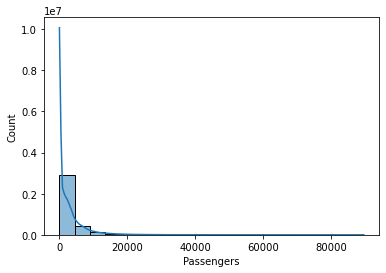

In [21]:
sns.histplot(df['Passengers'], bins=20, kde = True) # shows extreme values for 'Passengers'

<AxesSubplot:xlabel='Seats', ylabel='Count'>

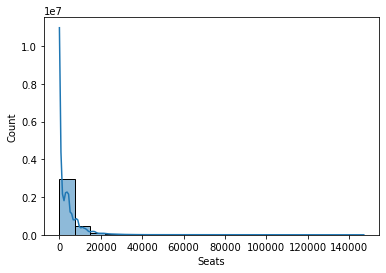

In [22]:
sns.histplot(df['Seats'], bins=20, kde = True) # shows extreme values for 'Seats'

<AxesSubplot:xlabel='Flights', ylabel='Count'>

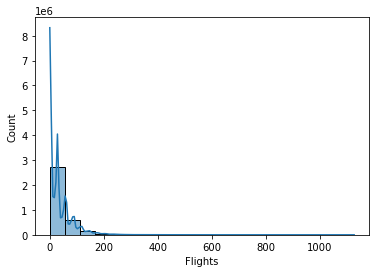

In [23]:
sns.histplot(df['Flights'], bins=20, kde = True) # shows extreme values for 'Flights'

<AxesSubplot:xlabel='Distance', ylabel='Count'>

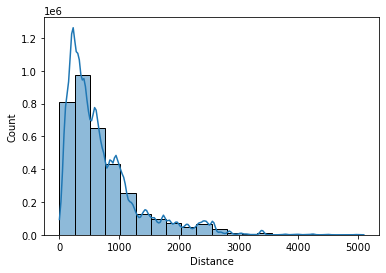

In [24]:
sns.histplot(df['Distance'], bins=20, kde = True) # shows extreme values for 'Distance'

In [25]:
# Select only entries with a non-zero rating

df = df[df['Passengers'] >0]

In [26]:
# Select only entries with a non-zero rating

df = df[df['Seats'] >0]

In [27]:
# Select only entries with a non-zero rating

df = df[df['Flights'] >0]

In [28]:
# Select only entries with a non-zero rating

df = df[df['Distance'] >0]

In [29]:
df.shape

(3211097, 24)

### 4. Plotting a choropleth

In [30]:
# Create a data frame with just the states and the values for rating we want plotted

data_to_plot = df[['Origin_state','Passengers']]
data_to_plot.head()

,Origin_state,Passengers
0,Oregon,41
1,Oregon,88
2,Oregon,11
4,Oregon,11
5,Oregon,2


In [31]:
data_to_plot_grouped = data_to_plot.groupby('Origin_state').sum()

In [32]:
data_to_plot_grouped.head(49)

,Passengers
Origin_state,
Alabama,50811828
Arizona,329167522
Arkansas,30543518
California,1078560616
Colorado,18611813
Connecticut,55091800
Delaware,29097
Florida,756940879
Georgia,598575954


In [33]:
data_to_plot_grouped.shape

(49, 1)

In [34]:
data_to_plot_grouped = data_to_plot_grouped.reset_index()

In [35]:
data_to_plot_grouped.shape

(49, 2)

In [36]:
# Setup a folium map at a high-level zoom
map = folium.Map(location = [100, 0], zoom_start = 1.5)

# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data = country_geo, 
    data = data_to_plot_grouped,
    columns = ['Origin_state', 'Passengers'],
    key_on = 'feature.properties.name', # this part is very important - check your json file to see where the KEY is located
    fill_color = 'YlOrRd', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "Passengers").add_to(map)
folium.LayerControl().add_to(map)

map

In [37]:
map.save('plot_data_Passengers.html')

In [38]:
# Create a data frame with just the states and the values for rating we want plotted

data_to_plot1 = df[['Origin_state','Distance']]
data_to_plot1.head()

,Origin_state,Distance
0,Oregon,103
1,Oregon,103
2,Oregon,103
4,Oregon,156
5,Oregon,156


In [39]:
data_to_plot_grouped1 = data_to_plot1.groupby('Origin_state').sum()

In [40]:
data_to_plot_grouped1 = data_to_plot_grouped1.reset_index()

In [41]:
data_to_plot_grouped1.head(49)

,Origin_state,Distance
0,Alabama,10235511
1,Arizona,74765612
2,Arkansas,7467805
3,California,259085616
4,Colorado,6199441
5,Connecticut,15164501
6,Delaware,72583
7,Florida,183037510
8,Georgia,80180899
9,Hawaii,43844046


In [42]:
# Setup a folium map at a high-level zoom
map = folium.Map(location = [100, 0], zoom_start = 1.5)

# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data = country_geo, 
    data = data_to_plot_grouped1,
    columns = ['Origin_state', 'Distance'],
    key_on = 'feature.properties.name', # this part is very important - check your json file to see where the KEY is located
    fill_color = 'YlOrRd', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "Distance").add_to(map)
folium.LayerControl().add_to(map)

map

In [43]:
map.save('plot_data_distance.html')

In [44]:
country_names = ['USA']*len(df.index)
df['Country'] = country_names

In [45]:
df.to_csv(os.path.join(path,'airport_clean_updated_63.csv' ))

In [46]:
df.to_csv(os.path.join(path,'airport_clean_updated_63.pkl' ))

In [47]:
df.head(5)

,Index,Origin_airport,Destination_airport,Origin_city,Destination_city,Passengers,Seats,Flights,Distance,Fly_date,...,Dest_airport_long,Fly_year,Fly_month,Fly_day,Fly_year_month,Distance_Category,Fly_year_Category,Origin_state_code,Origin_state,Country
0,1,EUG,RDM,Eugene,"Bend, OR",41,396,22,103,1990-11-01,...,-121.150002,1990,11,1,1990-11,Short Distance,1990-1994,OR,Oregon,USA
1,2,EUG,RDM,Eugene,"Bend, OR",88,342,19,103,1990-12-01,...,-121.150002,1990,12,1,1990-12,Short Distance,1990-1994,OR,Oregon,USA
2,3,EUG,RDM,Eugene,"Bend, OR",11,72,4,103,1990-10-01,...,-121.150002,1990,10,1,1990-10,Short Distance,1990-1994,OR,Oregon,USA
4,5,MFR,RDM,Medford,"Bend, OR",11,18,1,156,1990-03-01,...,-121.150002,1990,3,1,1990-03,Short Distance,1990-1994,OR,Oregon,USA
5,6,MFR,RDM,Medford,"Bend, OR",2,72,4,156,1990-01-01,...,-121.150002,1990,1,1,1990-01,Short Distance,1990-1994,OR,Oregon,USA
